<center>
<img src='https://i.postimg.cc/63rDLhtJ/lang-pic.jpg' width=600>
</center>
    
# 1. Introduction

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">1.1 NLP series</p>

This is the **sixth in a series of notebooks** covering the **fundamentals of Natural Language Processing (NLP)**. I find that the best way to learn is by teaching others, hence why I am sharing my journey learning this field from scratch. I hope these notebooks can be helpful to you too. 

NLP series:

1. [NLP1 - Tokenization](https://www.kaggle.com/samuelcortinhas/nlp1-tokenization)
2. [NLP2 - Pre-processing](https://www.kaggle.com/samuelcortinhas/nlp2-pre-processing) 
3. [NLP3 - Bag-of-Words and Similarity](https://www.kaggle.com/samuelcortinhas/nlp3-bag-of-words-and-similarity)
4. [NLP4 - TF-IDF and Document Search](https://www.kaggle.com/samuelcortinhas/nlp4-tf-idf-and-document-search)
5. [NLP5 - Text Classification with Naive Bayes](https://www.kaggle.com/samuelcortinhas/nlp5-text-classification-with-naive-bayes)
6. [NLP6 - Topic Modelling with LDA](https://www.kaggle.com/samuelcortinhas/nlp6-topic-modelling-with-lda) (this one)
7. [NLP7 - Word Embeddings](https://www.kaggle.com/code/samuelcortinhas/nlp7-word-embeddings)
8. [NLP8 - RNNs and Language Models](https://www.kaggle.com/samuelcortinhas/nlp8-rnns-and-language-models)
9. [NLP9 - Machine Translation and Attention](https://www.kaggle.com/samuelcortinhas/nlp9-machine-translation-and-attention) 
10. [NLP10 - Transformers](https://www.kaggle.com/samuelcortinhas/nlp10-transformers)

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">1.2 Outline</p>

In the last notebook, we covered a common supervised NLP task, i.e. Text Classification. In this notebook, we are going to explore a common **unsupervised** NLP task, namely **Topic Modelling**. 

Given a piece of text, Topic Modelling is the act of **automatically discovering topics** that different documents belong to. For example, we might associate a document with **sport, travel, cooking etc**. This might seem similar to text classification, however the big difference is that we **don't have any labelled training data** so we need a different approach. We are going to show how to do this using a **generative statistical model** called **Latent Dirichlet Allocation (LDA)**. 

# 2. Latent Dirichlet Allocation (LDA)

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">2.1 Assumptions</p>

<center>
<img src="https://i.postimg.cc/FK9m8MHS/topics.png" width=500>
</center>
<br>
<br>

In general, topic models make **two assumptions**. These are:

1. Every document is a **mixture of topics**.
2. Every topic is a **mixture of words**.

The first assumption is a fairly **natural** one. For example, an article of a politician talking about the economy could be associated with both politics and business. Even if one topic dominates a document, there are usually **multiple themes** that can be separated in every document. 

The second assumption is there because many topics can be described using different words with **similar or the same meaning**. For example, **security, crime, police, authority**, could all be used to describe one particular topic. Allowing for this **flexibility** often leads to better topic distributions and similarity search results.

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">2.2 Generative model</p>

<center>
<img src="https://i.postimg.cc/gcXgkyqn/LDA4.jpg" width=600>
</center>
<br>

Latent Dirichlet Allocation (LDA) is a **generative model** used to create new documents that are **similar** to the ones in our corpus. We will see later how we can use it for topic modelling, but for now let's try to understand how it works. 

The above image shows the **plate notation** of LDA. Each **rectangle** groups variables that **repeat together** with the number of repetitions given by a number in the box and each **arrow** showing a **dependency between variables**. I'm going to use this to describe the pseudo-code of LDA in various levels of generality, with it becoming more detailed every time.

<br>

**Version 1:**

<center>
<img src="https://i.postimg.cc/nrtTKRQh/LDA1.jpg" width=600>
</center>
<br>

```
for i in range(M):           # number of documents to generate
    for j in range(N):       # number of words to generate
        generate word w
```

<br>

In it's most general form, LDA is an algorithm that generates a **number of documents**, each with a **number of words** in. The question now is, how do we **sample a new word** each time? One way is to just pick a word from the corpus at **random** each time, but this will just produce nonsense. We can do better.

<br>

**Version 2:**

<center>
<img src="https://i.postimg.cc/ZRWm1Ljm/LDA2.jpg" width=600>
</center>
<br>

```
Choose topic T with distribution phi
for i in range(M):                      # number of documents to generate
    for j in range(N):                  # number of words to generate
        sample word w from phi
```

<br>

This time instead of choosing a word at random, we first **select a topic** T and then **sample** a word from the corresponding **distribution** of words for that topic. The motivation for this it that we expect different topics to have **different word frequency patterns**. For example, if the topic is sport we would like words like ball, pitch, player to appear more often than words like pizza, car, rain. Note that phi is a random variable of length equal to the size of the vocabulary. 

<br>

**Version 3:**

<center>
<img src="https://i.postimg.cc/fbDWVXCn/LDA3.jpg" width=600>
</center>
<br>

```
for i in range(M):                      # number of documents to generate
    update mixture theta
    for j in range(N):                  # number of words to generate
        sample topic T from mixture theta using z
        sample word w from distribution phi corresponding to topic T
```

<br>

In version 3, we've incorporated our assumption about documents being a **mixture of topics**. Instead of picking a single topic, we choose a mixture of topics using **theta**. This is a random variable with length equal to the number of topics, e.g. (0.2, 0.5, 0.3), and is updated every time we generate a document.

So now to sample a word, we first sample a topic T from **theta** using **z** and then sample a word from the distribution **phi** corresponding to T. The important thing to note is that **z** is **updated every time** we generate a new word. So the topic could change with every word, but the distribution of topics will stay the same for every document, e.g. 20% sport, 50% travel, 30% weather. 

<br>

**Version 4:**

<center>
<img src="https://i.postimg.cc/gcXgkyqn/LDA4.jpg" width=600>
</center>
<br>

```
for k in range(K):                      # number of topics
    generate distribution phi using beta
    
for i in range(M):                      # number of documents to generate
    generate mixture theta using alpha
    for j in range(N):                  # number of words to generate
        sample topic T from mixture theta using z
        sample word w from distribution phi corresponding to topic T
```

<br>

Finally, we have modified our model to include the ability to automatically **update the mixture of topics** (i.e. update **theta**) in each document by sampling from a distribution **alpha**. Also, it is now able to automatically **generate the best distribution of words** (i.e. **phi**) for each topic by sampling from a distribution **beta** K separate times. This is very useful as now all we need to specify to make predictions is **M, N and K**.

The last piece of the puzzle is what are the correct distributions for **alpha** and **beta**? It turns out what we actually need is something called the **Dirichlet distribution**.

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">2.3 Dirichlet distribution</p>

We are after a way of **generating multinomial distributions** (generalization of the binomial distribution). In particular, if we focus on the topic mixture distribution theta, we want a way of generating a vector of length equal to the number of topics $(\theta_1,\theta_2,...,\theta_K)$ where the components are probabilities that add up to one, i.e. $\sum_{k=1}^{K} \theta_k = 1$ and $0 \leq \theta_k \leq 1$. 

This set of possibilies is called a **simplex**, and in K=3 dimensions it looks like a triangle going through the standard basis vectors (1,0,0), (0,1,0) and (0,0,1). Each **corner** corresponds to one of the topics and the closer a point is to one, the **stronger** that topic gets represented in a document.

<center>
<img src="https://i.postimg.cc/T1nvqBLh/simplex3-D.png" width=280>
</center>

So we need a way of **randomly sampling** a point from this simplex. We could just close our eyes, throw a dart at the triangle and see where it lands but this would lead to a uniform distribution of points over the simplex. What if we want the documents to be composed of an **even mixture** of topics (i.e. points closer to the center), or perhaps instead be dominated by a single topic (i.e. points closer to the corners). 

We can model this behaviour by using a **concentration parameter**, $\alpha = (\alpha_1,\alpha_2,...\alpha_K) \in \mathbb{R}^K_+$. In general, the larger the value of $\alpha_i$, the more concentrated the sampled distributions are towards topic $i$. On the other hand, the smaller the value of $\alpha_i$, the more concentrated the sampled distributions are towards topics other than $i$. 

<center>
<img src="https://i.postimg.cc/vTh8VXPJ/dirichlet.jpg" width=500>
</center>

We have arrived at the **Dirichlet distribution**, which does exactly what we've described above. It is the multivariate generalization of the beta distribution and mathematically is defined by the **probability density function**:

$$
p(x) = \frac{1}{B(\alpha)} \prod_{i=1}^{K} x_{i}^{\alpha_{i}-1} 
$$

where $B(\alpha)$ is a normalizing constant given by the multivariate beta function. 

Note that when $0<\alpha_i<1$ then the exponent is negative, i.e. $\alpha_{i}-1<0$ and since $0<x_{i}<1$ we are essentially dividing by a small number so the term $x_{i}^{\alpha_{i}-1}$ can become very large (i.e. topic $i$ is important). The oppositive is true when $\alpha_i>1$, in particular, $\alpha_{i}-1>0$ so the term $x_{i}^{\alpha_{i}-1}$ tends to be very small (i.e. topic $i$ is not important). That being said, the relative size of all the $\alpha_i$'s is really what decides how much each topic gets represented. 

The Dirichlet distribution is sometimes called a **distribution over distributions** or **prior distribution** because when we sample from it, we get a vector which can be used as the parameters of another distribution (in our cases, the multinomial distribution). 

In LDA above, we use Dirichlet distributions **alpha** and **beta** to sample the parameters for the topic-mixture and topic-word distributions, respectifully. The only difference between them is the number of dimensions. alpha has K dimensions, whereas beta has a dimension equally to the number of unique words in the vocabulary. 

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">2.4 LDA for Topic Modelling</p>

We have finished defining the **LDA generative model** complete with **Dirichlet priors**. We can now use this model to **generate new documents** for us if we specify the necessary parameters in alpha and beta, as well as the number of topics, words and documents. 

So how can we use this for **topic modelling** in a new corpus of text? We are going to achieve this by **training** an LDA model (i.e. finding the best parameters alpha and beta) that can generate documents that are as **similar** (in terms of word distribution) to the ones in our corpus as possible. Because of the way we constructed the LDA model, it will identify **K topics** and their corresponding word distributions that reasonably describe the major themes in our corpus. We can even look at the word distributions **phi** to try to understand what each topic is about. 

However, we are not actually going to use it to generate new documents. After all, LDA is **not a very good language model** because it has no sense of word order, grammar or sentences. It is just a simplified way of modelling how humans generate text that happens to be very useful for topic modelling.

<br>

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">2.5 Collapsed Gibbs Sampling</p>

One way of training an LDA model is called **Collapsed Gibbs Sampling** (CGS). This is **Monte Carlo Markov Chain** (MCMC) algorithm used to get **approximate samples** from a distribution when direct sampling is not feasible. Although this sequence of samples is an approximation, it will tend towards a desired equilibrium distribution. 

The variables theta and phi in LDA are called **latent variables** because they are variables that **cannot be observed**. These are the variables we want to infer but the only thing we can observe are the **words** in the corpus. And this is what **statistical inferencing** techniques like CGS are designed for. 

The **collapsed** part in CGS refers to having both theta and phi integrated out and only focusing on inferring **z** instead, i.e. the per word topic assignments, which is much easier to do. From this we will be able to retrieve theta and phi. 

<center>
<img src="https://i.postimg.cc/TYSN2CgC/CGS.jpg" width=600>
</center>

<br>

**High-level overview:**

Let's work through an example to get a better idea of how GCS works. 

1. Begin by **randomly assigning a topic** to every word in every document. 
2. Count the number of times each **topic k appears** in document d. 
3. Count the number of times each **word is assigned topic k** accross the entire corpus. 

Steps 2 and 3 result in **topic-document** and **word-topic** frequency tables, respectfully. We then begin to iterate over the following steps:

4. In document d, **unassign a word** from its topic.
5. **Reassign that word** a new topic based on the two frequency tables above, i.e. how frequent each topic is in this document and how frequent that word is in each topic. The exact formula is given by

<br>

$$
\hat{k} \sim \, \frac{n_{d,k} + \gamma}{\sum_{i=1}^{K} n_{d,i} + \gamma K} \times \frac{m_{w,k} + \delta}{\sum_{j=1}^{V} m_{j,k} + \delta V}
$$

<br>

The first fraction gives the **relative frequency** of **topic k in document d**, whilst the second fraction gives the **relative frequency** of **word w in topic k**. **Additive smoothing** is applied to both terms via the hyperparameters $\gamma$ and $\delta$ because we don't want topics to completely die out. 

Note that every time we perform steps 4 and 5 we also **update** the frequency tables from step 2 and 3. Finally, once we've reached some **convergence criteria** like the number of iterations, we stop iterating. 

<br>

**Retrieving latent variables:**

After we have performed GCS, we end up with a corpus where **every word is assigned a topic**. To retrieve the latent variables we were after in the first place, we simply need to calculate their **relative frequencies** in the corpus like we did before:

<br>

$$
\theta_d(k) = \frac{n_{d,k} + \gamma}{\sum_{i=1}^{K} n_{d,i} + \gamma K}, \qquad \quad \phi_k(w) = \frac{m_{w,k} + \delta}{\sum_{j=1}^{V} m_{j,k} + \delta V}
$$

# 3. Application

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">3.1 Topic Modelling</p>

We're going to use a library called **Gensim** and its implementation of LDA for topic modelling. 

<br>
<br>

**Import libraries**

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_colwidth', 600)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.6)
import spacy
import random
from gensim import models, corpora, similarities
from wordcloud import WordCloud

**Load data**

<br>

The dataset we're going to use is a large corpus of **spotify song lyrics** from a wdie variety of artists. The goal is to identify the major topics in each song. 

In [2]:
# Load data into list
songs_df = pd.read_csv("/kaggle/input/spotify-million-song-dataset/spotify_millsongdata.csv")
data = list(songs_df["text"])

# Print length and example
print("Number of songs:", len(data))
print("\nFirst song:", data[0])

Number of songs: 57650

First song: Look at her face, it's a wonderful face  
And it means something special to me  
Look at the way that she smiles when she sees me  
How lucky can one fellow be?  
  
She's just my kind of girl, she makes me feel fine  
Who could ever believe that she could be mine?  
She's just my kind of girl, without her I'm blue  
And if she ever leaves me what could I do, what could I do?  
  
And when we go for a walk in the park  
And she holds me and squeezes my hand  
We'll go on walking for hours and talking  
About all the things that we plan  
  
She's just my kind of girl, she makes me feel fine  
Who could ever believe that she could be mine?  
She's just my kind of girl, without her I'm blue  
And if she ever leaves me what could I do, what could I do?




In [3]:
# Clean text
clean_data = [i.replace('\n','').replace('\r','') for i in data]

**Tokenizer**

<br>

We're going to build a custom spacy tokenizer that in addition to **stop word removal** and **lemmatization**, also filters out words that aren't **adjectives, nouns or verbs**. This often improves the quality of the topics generated in topic modelling. 

In [4]:
# Load English language model
nlp = spacy.load("en_core_web_sm")

# Disable named-entity recognition and parsing to save time
unwanted_pipes = ["ner", "parser"]

# Custom tokenizer using spacy
def custom_tokenizer(doc):
    with nlp.disable_pipes(*unwanted_pipes):
        return [t.lemma_ for t in nlp(doc) if t.is_alpha and not t.is_space and not t.is_punct and not t.is_stop and t.pos_ in ["ADJ","NOUN","VERB"]]

To speed up tokenization, we'll use spacy's `nlp.pipe` function, which allows for processing **multiple batches in parallel**. 

In [5]:
%%time

# Tokenize data
tokenized_data = list(map(custom_tokenizer, nlp.pipe(clean_data, n_process=4)))

# Print example
print(tokenized_data[0])

['look', 'face', 'wonderful', 'face', 'mean', 'special', 'look', 'way', 'smile', 'see', 'lucky', 'fellow', 'kind', 'girl', 'make', 'feel', 'fine', 'believe', 'kind', 'girl', 'blue', 'leave', 'walk', 'park', 'hold', 'squeeze', 'hand', 'walk', 'hour', 'talk', 'thing', 'plan', 'kind', 'girl', 'make', 'feel', 'fine', 'believe', 'kind', 'girl', 'blue', 'leave']
CPU times: user 24min 8s, sys: 13.9 s, total: 24min 22s
Wall time: 24min 47s


**Modelling**

<br>

The first step to use Gensim is to create a **dictionary** that maps tokens to integer IDs. To improve separability of topics, we **filter** out tokens that appear in **less than 5 documents** and tokens that appear in **over 50% of documents**. 

In [6]:
# Build dictionary of (token, ID) mappings
dct = corpora.Dictionary(tokenized_data)

# Print vocab size
print('Size of vocabulary before filtering:', len(dct))

# Filter overly low and high frequency tokens
dct.filter_extremes(no_below=5, no_above=0.5)

# Print vocab size
print('\nSize of vocabulary after filtering:', len(dct))

# Example mappings
print("\nExample mappings:", [(i,dct.token2id[i]) for i in tokenized_data[0][:10]])

Size of vocabulary before filtering: 48022

Size of vocabulary after filtering: 13002

Example mappings: [('look', 12), ('face', 2), ('wonderful', 26), ('face', 2), ('mean', 15), ('special', 20), ('look', 12), ('way', 25), ('smile', 19), ('see', 18)]


We also need to **vectorize** the tokenized text into a Bag-of-Words matrix. We do that using the `.doc2bow` method of the dictionary.

In [7]:
# Bag-of-Words sparse matrix
bow = [dct.doc2bow(i) for i in tokenized_data]

**Train model**

<br>

And now we can **train the LDA model** by passing in the Bag-of-Words matrix, the (token,ID) mapping dictionary and the number of topics to identify. Furthermore, we can also specify the number of **forward passes** in training and the **prior distributions** (in our case the model will automatically learn asymmetric priors for us).  

In [8]:
%%time

# Train LDA model
lda_model = models.LdaModel(corpus=bow, num_topics=10, passes=10, alpha='auto', eta='auto', id2word=dct, random_state=0)

CPU times: user 4min 25s, sys: 140 ms, total: 4min 25s
Wall time: 4min 25s


In [9]:
# Print generated topics
lda_model.print_topics()

[(0,
  '0.026*"world" + 0.025*"sing" + 0.024*"soul" + 0.023*"free" + 0.021*"child" + 0.016*"bear" + 0.016*"hand" + 0.015*"bring" + 0.013*"song" + 0.012*"life"'),
 (1,
  '0.144*"go" + 0.115*"come" + 0.088*"want" + 0.035*"hear" + 0.034*"say" + 0.032*"tell" + 0.024*"stop" + 0.022*"talk" + 0.020*"play" + 0.018*"wait"'),
 (2,
  '0.125*"girl" + 0.115*"little" + 0.062*"boy" + 0.053*"like" + 0.042*"woman" + 0.021*"daddy" + 0.019*"lady" + 0.016*"bit" + 0.015*"o" + 0.011*"pretty"'),
 (3,
  '0.108*"get" + 0.045*"man" + 0.034*"good" + 0.027*"be" + 0.016*"money" + 0.015*"bad" + 0.014*"big" + 0.012*"work" + 0.010*"old" + 0.009*"got"'),
 (4,
  '0.021*"dance" + 0.017*"fuck" + 0.017*"shit" + 0.014*"nigga" + 0.014*"bitch" + 0.013*"hit" + 0.009*"party" + 0.009*"beat" + 0.009*"chorus" + 0.009*"hot"'),
 (5,
  '0.054*"blue" + 0.046*"high" + 0.042*"rock" + 0.041*"roll" + 0.031*"water" + 0.029*"sea" + 0.029*"ride" + 0.027*"river" + 0.016*"mountain" + 0.015*"wave"'),
 (6,
  '0.169*"love" + 0.059*"let" + 0.056*

Notice how when we print out the learned Dirichlet parameters, they are all **less than 1**. This signifies that most songs are **dominated by 1 topic** and each topic is **dominated by a small number of words**.

In [10]:
print(lda_model.alpha) # Document-topic prior
print(lda_model.eta) # Topic-word prior (beta)

[0.5446106  0.77889705 0.30404204 0.72511584 0.3182893  0.23629892
 0.8928164  0.8758768  1.7863417  0.31821764]
[0.09601828 0.09970695 0.13978635 ... 0.06367084 0.06368425 0.06346421]


**Top topics in corpus**

In [11]:
# Get topics
topics = list(lda_model.get_document_topics(bow, minimum_probability=0))

# Print topic proportion in corpus
for i in range(10):
    print(f"Topic {i} proportion: {100*sum([pair[i][1] for pair in topics])/len(topics):.1f}%")

Topic 0 proportion: 8.1%
Topic 1 proportion: 10.2%
Topic 2 proportion: 4.0%
Topic 3 proportion: 10.7%
Topic 4 proportion: 5.2%
Topic 5 proportion: 3.3%
Topic 6 proportion: 14.7%
Topic 7 proportion: 13.3%
Topic 8 proportion: 26.3%
Topic 9 proportion: 4.2%


**Top topics in song**

<br>

We can also look at the **distribution of topics and words** for a given song using the `.get_document_topics` method. This function returns the most frequent topics and their topic-word distributions for a given song. 

In [12]:
# Return top topics in a song
def get_top_topics(song_idx, min_prob):

    # Sort topics from highest to lowest frequency
    topics = sorted(lda_model.get_document_topics(bow[song_idx], minimum_probability=min_prob), key=lambda tup: tup[1])[::-1]

    # Get word distribution for each topic
    pairs = [lda_model.show_topic(pair[0]) for pair in topics]
    topic_words = [[pair[0] for pair in topic] for topic in pairs]

    return pd.DataFrame({'Major Topics': topics,'Topic Words': topic_words})

In [13]:
# Example
display(get_top_topics(100, 0.25))
print(data[100][:300])

,Major Topics,Topic Words
0,"(8, 0.37605783)","[time, look, life, think, way, find, try, leave, mind, eye]"
1,"(7, 0.27363387)","[day, night, dream, light, sun, fly, rain, shine, star, sky]"


The city is a jungle, you better take care  
Never walk alone after midnight  
If you don't believe it you better beware  
Of me  
  
I am behind you, I'll always find you, I am the tiger  
People who fear me never go near me, I am the tiger  
  
The city is a nightmare, a horrible dream  



## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">3.2 Evaluating Topics</p>

Evaluating topic modelling predictions is always **difficult** because of the unsupervised and subjective nature of the task. Often the best thing to do is a **qualitative evaluation** by getting humans to look at the topics.

There is ongoing research, however, to try to find reliable **quantitative metrics** to evaluate topic modelling. An example is a metric called **Coherence**, which measures co-occurrence of words within topics ([reference](http://svn.aksw.org/papers/2015/WSDM_Topic_Evaluation/public.pdf)).

In [14]:
# Coherence score (closer to 0 the better)
coherence_model = models.coherencemodel.CoherenceModel(model=lda_model, texts=tokenized_data, dictionary=dct, coherence='u_mass')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score: {coherence_score:.4f}')

Coherence Score: -2.2261


Another approach is called **word intrusion**, where a word from a different topic gets added to another topic's word collection. The easier it is for a human to identify the intruder word the more distinct each topic is, which can be used as a proxy for **topic quality**. 

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">3.3 Visualizing Topics</p>

To quickly get a sense of what each topic is about, we can use **word clouds**. From this, the topics could then be manually labelled. 

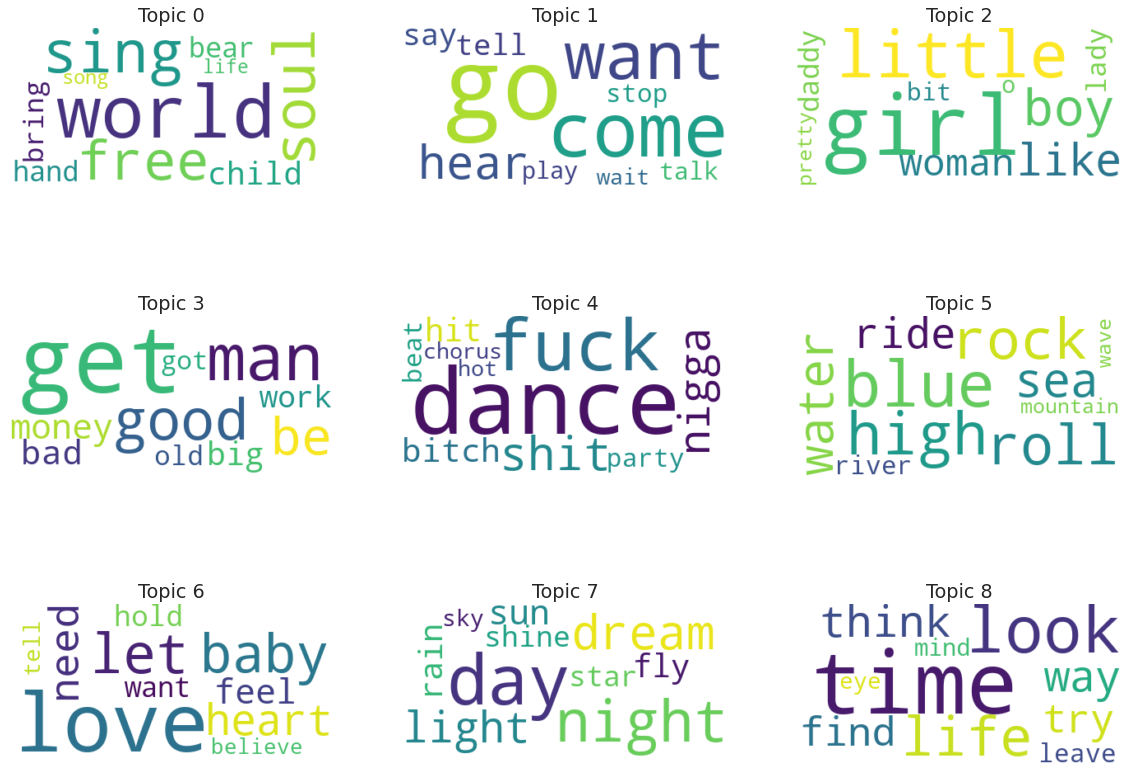

In [15]:
# Plot word clouds for each topic
word_cloud = WordCloud(background_color='white', max_words=10)
fig, axes = plt.subplots(3, 3, figsize=(20,15))

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(lda_model.show_topic(i))
    word_cloud.generate_from_frequencies(topic_words)
    plt.gca().imshow(word_cloud, interpolation='bilinear')
    plt.gca().set_title(f'Topic {i}')
    plt.gca().axis('off')
plt.show()

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">3.4 Finding Similar Documents</p>

A very nice application of topic modelling is that we can use it to **find similar documents** by looking at their topic distribution, even if these documents have very **few overlapping words**. In our case, we're going to use it to **recommend similar songs** based on the topics of a particular song. 

We'll use Gensim's `MatrixSimilarity` function to compute **cosine similarity** across the whole corpus and store this in a matrix of indices. 

In [16]:
# Compute and rank consine similarities
lda_index = similarities.MatrixSimilarity(lda_model[bow], num_features=len(dct))

The following function retrieves the **first m words** of the **top n articles** in a particular topic. This will give us an idea of the most representative samples in each topic. 

In [17]:
# Returns most similar songs to a given song
def get_similar_songs(song_bow, top_n=5, first_m_words=300):
    similar_songs = lda_index[lda_model[song_bow]]
    top_n_docs = sorted(enumerate(similar_songs), key=lambda item: -item[1])[1:top_n+1]
  
    # Returns (song id, similarity score, first_m_words of song)
    return list(map(lambda entry: (entry[0], entry[1], clean_data[entry[0]][:first_m_words]), top_n_docs))

In [18]:
# Example
print(data[6864][:300],'\n')
get_similar_songs(bow[6864])

[Verse:]  
She's just a girl and she's on fire  
Hotter than a fantasy, lonely like a highway  
She's living in a world and it's on fire  
Filled with catastrophe, but she knows she can fly away  
  
Ohhhh oh oh oh oh  
She got both feet on the ground  
And she's burning it down  
Ohhhh oh  



[(24058,
  0.97773397,
  'Requiem    Libera me, Domine, de morte aeterna,  In die illa tremenda,  Quando coeli movendi sunt et terra.  Dum veneris judicare saeculum  Per ignem.  Tremens factus sum ego, et timeo,  Dum discussio venerit atque  Ventura ira  Quando coeli movendi sunt et terra.  Dies illa, dies irae, calamitatis '),
 (200,
  0.96498376,
  "Oooh, she's on fire  Oooh, she's on fire  Hot to trot, she's a bit insane  Little bit a pleasure  With a little bit a pain  I got to be smokin'  So I know without a doubt  Where there's smoke there's fire  So I gotta boot it out  Say oooh, she's on fire  Oooh, she's on fire  Homely child with a hang"),
 (44158,
  0.9628403,
  "Go  It's a missile girl  In a missile world    Human tongue feels aluminum-plate  It's a missile boy  Oh oh oh oh oh  Death machine and man in love  Oh oh oh oh oh  Tracking system checks out pulse, all systems go  Go go go go go  Rocket-blast fury with a manual sex-drive  Go go go go go    It's a m"),
 (11376,
  0.

Finally, we'll show how to search for **similar songs** when the reference **song isn't in our corpus**, e.g. maybe a new song came out.

In [19]:
# Pass new song through pipeline
new_song = "Demons on my shoulder Monsters in my head Shadow in the water Will you be my friend The world revolves around me As I lay in my bed Dreaming of more, more"
new_tokens = list(map(custom_tokenizer, [nlp(new_song)]))[0]
new_bow = dct.doc2bow(new_tokens)

print(new_song,'\n')
get_similar_songs(new_bow)

Demons on my shoulder Monsters in my head Shadow in the water Will you be my friend The world revolves around me As I lay in my bed Dreaming of more, more 



[(16654,
  0.98699737,
  '[Verse 1:]  Somebody?s watching, watching you all the time  Somebody?s waiting, waiting for you to lose your mind  Wishes are like broken glass show the cracks of you past  Thought you left it all behind  Sailing on ship of fools  You got nothing left to prove  Hidden from the naked eye    [Chorus:]'),
 (24853,
  0.9865334,
  "If this person that you see  Seems a little blurred,  It's cause I'm not all here,  But not quite there.  And if it's like forever  That you're talkin' to yourself  It's not that I feel different  I'm just somewhere else    If I lack a certain etiquette  Break all the social laws  This door is off i"),
 (28409,
  0.9861906,
  "My life is a house  You crawl through the window  Slip across the floor and into the reception room  You enter the place of endless persuasion  Like a knock on the door  When there's ten or more things to do  Who is that calling?  You my companion  Run to the water on a burning beach  And it brings "),
 (33499,
  0

# 4. Conclusion

In this notebook, we have given a detailed overview of the **Latent Dirichlet Allocation** model and how it can be used for unsupervised **Topic Modelling**. Below are a few final remarks and thoughts:

* Gensim trains an LDA model using **Variational Bayes** as opposed to Collapsed Gibbs Sampling, which is another Bayesian Inference technique and as is typically very fast. 
* Topic modelling **works better** for large corpuses with **longer documents** as this reduces the chance of overfitting to noise. 
* There are many use cases for topic modelling. These include **recommendation systems** (like we've seen), **media monitoring** (to identify current trends), **knowledge management** (to organize solutions within a company), etc.
* Finally, there are many other approaches that can be taken. For example, we could apply **k-Means** to the Bag-of-Words matrix to allocate exactly one topic for document. There are also other models like **Latent Semantic Analysis** (LSA) and more recently developed **transformer**-based models. 

**References:**
* [NLP demystified](https://www.nlpdemystified.org/)

Thanks for reading!